In [1]:
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_path = os.environ['HOME'] + '/cifar10/simpleCNN'
if os.path.isdir(base_path):
  pass
else:
  os.makedirs(base_path)

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=base_path + '/data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root=base_path + '/data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Extracting /Users/shinjisoo/cifar10/simpleCNN/data/cifar-10-python.tar.gz to /Users/shinjisoo/cifar10/simpleCNN/data
Files already downloaded and verified


In [4]:
def imshow(img):
  img = img/2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show

 frog  ship horse  frog


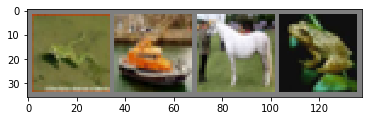

In [5]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x #logit
    
net = Net()

In [7]:
hypothesis = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [8]:
for epoch in range(10):The 
  running_loss = 0.0
  
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    
    outputs = net(inputs)
    loss = hypothesis(outputs, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if i % 2000 == 1999:
      print("[{}, {}] loss:{}".format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0
print('Finished Training')

[1, 2000] loss:2.2714589357972144
[1, 4000] loss:2.062845400482416
[1, 6000] loss:1.9296872891783714
[1, 8000] loss:1.7448920100182295
[1, 10000] loss:1.6639011654108762
[1, 12000] loss:1.5168477007597685
[2, 2000] loss:1.4398815391659736
[2, 4000] loss:1.4021495780572295
[2, 6000] loss:1.3623977253735065
[2, 8000] loss:1.3432294687330724
[2, 10000] loss:1.3197567183449865
[2, 12000] loss:1.3044659230969846
[3, 2000] loss:1.2450725867785513
[3, 4000] loss:1.2027677887380124
[3, 6000] loss:1.2231510136909782
[3, 8000] loss:1.2066065395027399
[3, 10000] loss:1.1825142965912818
[3, 12000] loss:1.1882063397727907
[4, 2000] loss:1.102114264825359
[4, 4000] loss:1.1059249050579965
[4, 6000] loss:1.1335841677673162
[4, 8000] loss:1.1005105769708752
[4, 10000] loss:1.117434832725674
[4, 12000] loss:1.1084162396788597
[5, 2000] loss:1.0263993378207088
[5, 4000] loss:1.0358832545317709
[5, 6000] loss:1.048070839884691
[5, 8000] loss:1.049882620960474
[5, 10000] loss:1.0491053204843774
[5, 12000]

In [9]:
PATH = base_path + '/simpleCNN.pt'
torch.save(net, PATH)

/usr/local/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MaxPool2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Ground truth: ['cat', 'ship', 'ship', 'plane']


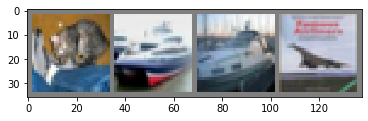

In [10]:
test_dataiter = iter(testloader)
images, labels = test_dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Ground truth: {}'.format([classes[label] for label in labels]))

In [11]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: {}'.format([classes[label] for label in predicted]))

Predicted: ['cat', 'car', 'ship', 'plane']


In [12]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy:{}%'.format(100*correct/total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy:60.87%
Accuracy of plane : 60 %
Accuracy of   car : 76 %
Accuracy of  bird : 29 %
Accuracy of   cat : 43 %
Accuracy of  deer : 64 %
Accuracy of   dog : 49 %
Accuracy of  frog : 65 %
Accuracy of horse : 74 %
Accuracy of  ship : 70 %
Accuracy of truck : 74 %


tensor([3, 1, 8, 0])  tensor([3, 8, 8, 0])


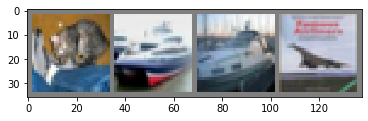

In [13]:
PATH = base_path + '/simpleCNN.pt'
the_model = torch.load(PATH)

images, labels = next(iter(testloader))
_, predicted = torch.max(the_model(images), 1)
print(predicted, "\b", labels)
imshow(torchvision.utils.make_grid(images))